In [46]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.tree import plot_tree

# For saving models
import pickle

In [47]:
df0 = pd.read_csv('./dataset/HR_capstone_dataset.csv')

In [48]:
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [49]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [50]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [51]:
# standardizing and correcting the column names
df0.rename(columns={
    'Work_accident':'work_accident',
    'Department':'department',
    'average_montly_hours':'average_monthly_hours',
    'time_spend_company': 'tenure'}, inplace=True)

In [52]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [53]:
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [54]:
df0.duplicated().sum()

np.int64(3008)

In [55]:
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [56]:
df1 = df0.drop_duplicates(keep='first')

In [57]:
df1.duplicated().sum()

np.int64(0)

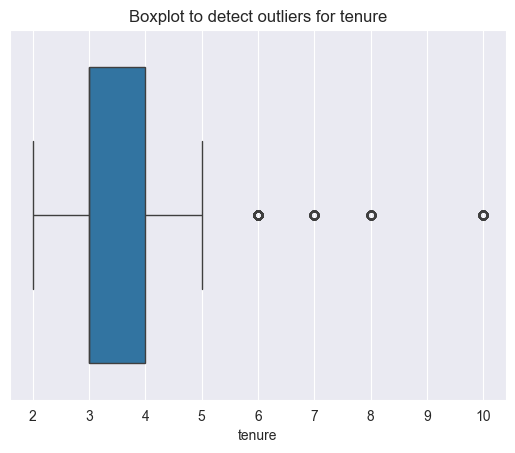

In [58]:
# using a boxplot to visualize distribution of "tenure" and detecting the outliers

plt.title('Boxplot to detect outliers for tenure', fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [59]:
q1 = np.percentile(df1['tenure'], 25)
q3 = np.percentile(df1['tenure'], 75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers_tenure = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
print(f"number of rows in the data that contains outliers in tenure {len(outliers_tenure)}")

Lower limit: 1.5
Upper limit: 5.5
number of rows in the data that contains outliers in tenure 824


In [60]:
df1['left'].value_counts(normalize=True)*100

left
0    83.39588
1    16.60412
Name: proportion, dtype: float64

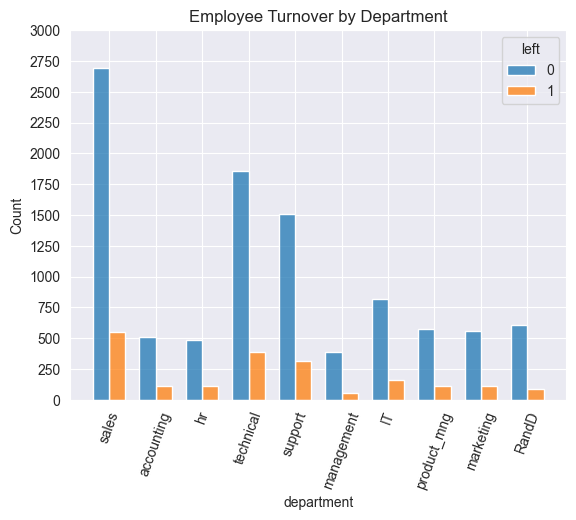

In [61]:
sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink=0.7, bins=10)
plt.xticks(rotation=70)
plt.title('Employee Turnover by Department', fontsize=12)
plt.yticks(range(0, 3250, 250))
plt.show()

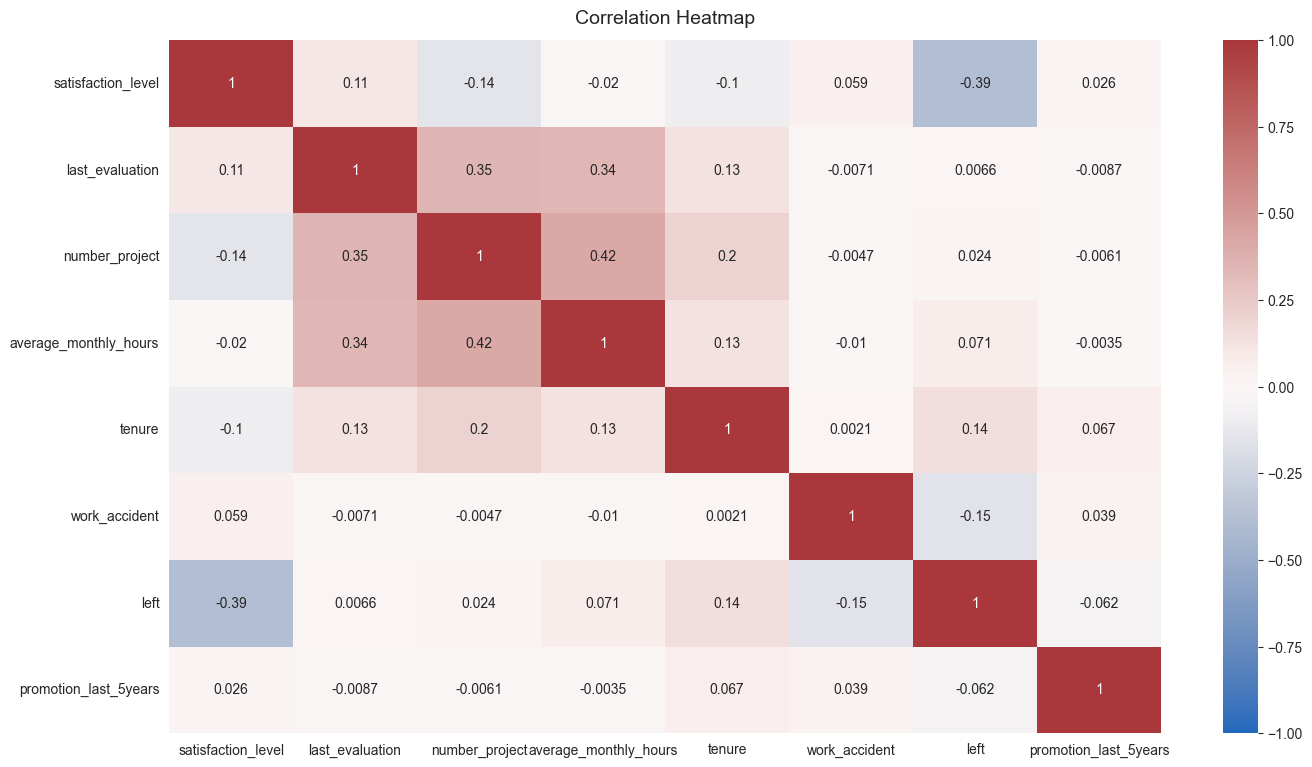

In [62]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.select_dtypes(include=["number"]).corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True,))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [63]:
df1[df1['tenure']>6]['left'].value_counts()

left
0    282
Name: count, dtype: int64

the longest-tenured employees didn't leave.

In [64]:
df1.groupby(['left'])['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


In [65]:
df_enc = df1.copy()

salary_mapping = {"low":0, "medium":1, "high":2}
df_enc['salary'] = df_enc['salary'].map(salary_mapping)

df_enc['salary'].unique()

array([0, 1, 2])

In [66]:
df_enc = pd.get_dummies(df_enc, drop_first=True)

In [67]:
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


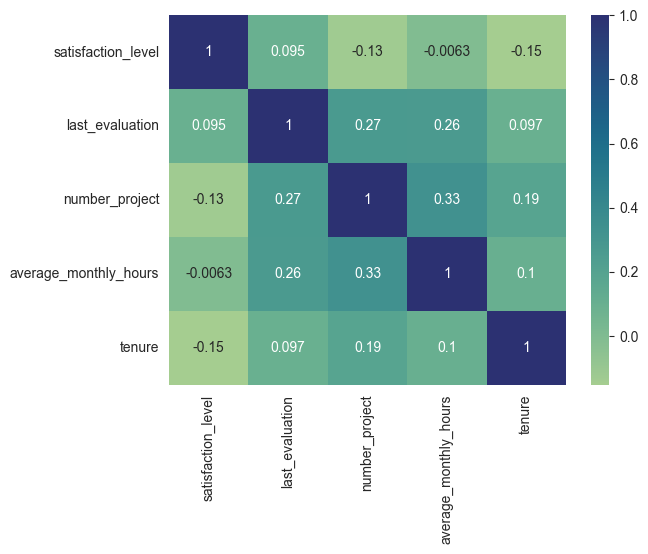

In [68]:
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), annot=True, cmap="crest");

In [69]:
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [70]:
y = df_logreg['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [71]:
X = df_logreg.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,True,False,False


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [73]:
log_clf = LogisticRegression(random_state=42,max_iter=500).fit(X_train, y_train)

In [74]:
y_pred = log_clf.predict(X_test)

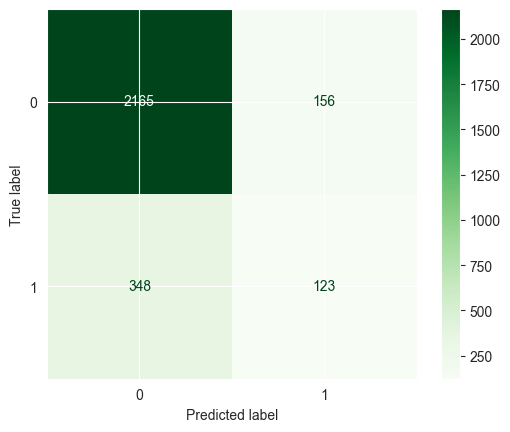

In [75]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens');

In [76]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



### tree-based modeling

#### decision tree

In [77]:
y = df_enc.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [78]:
X = df_enc.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,True,False,False


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [80]:
tree = DecisionTreeClassifier(random_state=42)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tree1 = GridSearchCV(estimator=tree, param_grid=cv_params, scoring=scoring, cv=4, n_jobs=-1, refit='roc_auc')

In [81]:
%time
tree1.fit(X_train, y_train)

CPU times: user 10 μs, sys: 8 μs, total: 18 μs
Wall time: 48.9 μs


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [4, 6, ...], 'min_samples_leaf': [2, 5, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,-1
,refit,'roc_auc'
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [82]:
def make_results(model_name:str, model_object, metric:str):
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }


    cv_results = pd.DataFrame(model_object.cv_results_)


    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]


    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

In [83]:
tree1_cv_results = make_results('DecisionTreeClassifier', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,DecisionTreeClassifier,0.963198,0.922352,0.942266,0.981208,0.968874


#### random forest

In [84]:
rf = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf1 = GridSearchCV(estimator=rf, param_grid=cv_params, scoring=scoring, cv=4, n_jobs=-1, refit='roc_auc')

In [85]:
rf1.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'max_features': [1.0], 'max_samples': [0.7, 1.0], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,-1
,refit,'roc_auc'
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [86]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [87]:
path_ = "./models/"

In [88]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [89]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [91]:
write_pickle(path_, rf1, 'hr_rf1')

In [92]:
rf1 = read_pickle(path_, "hr_rf1")

In [93]:
rf1.best_score_

np.float64(0.9778115059595968)

In [94]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

                    model  precision    recall        F1  accuracy       auc
0  DecisionTreeClassifier   0.963198  0.922352  0.942266  0.981208  0.968874
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.985646  0.915662  0.949349  0.983765  0.977812


In [95]:
# generates a table of test scores
def get_scores(model_name:str, model, X_test_data, y_test_data):
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

In [96]:
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.984716,0.907445,0.944503,0.982322,0.952323


### future engineering

the high model scores should be viewed with skepticism as data leakage is likely occurring. the satisfaction_level column won't be available for all employees in real-world scenarios, and `average_monthly_hours` might reflect employees who have already decided to quit working fewer hours, creating leakage. while all variables were used in the initial models, a more realistic approach will be taken this time.
the `satisfaction_level` column will be completely dropped, and a binary feature called overworked will be created instead of using average_monthly_hours directly. this feature will capture whether an employee is overworked, enabling the development of a more production-ready model that better reflects real-world deployment conditions.


In [97]:
df2 = df_enc.drop('satisfaction_level', axis=1)

In [98]:
# for now, it is identical to average monthly hours
df2['overworked'] = df2['average_monthly_hours']
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


being overworked can be defined as working more than 175 per month on average since the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day is approximately 166.67.

In [99]:
df2['overworked'] = (df2['overworked'] > 175).astype(int)
df2['overworked']

0        0
1        1
2        1
3        1
4        0
        ..
11995    1
11996    1
11997    1
11998    0
11999    1
Name: overworked, Length: 11991, dtype: int64

In [100]:
df2 = df2.drop('average_monthly_hours', axis=1)

In [101]:
y = df2['left']

X = df2.drop('left', axis=1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [103]:
tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [104]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 3.14 s, sys: 79.2 ms, total: 3.22 s
Wall time: 3.5 s


,estimator,DecisionTreeC...andom_state=0)
,param_grid,"{'max_depth': [4, 6, ...], 'min_samples_leaf': [2, 5, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,None
,refit,'roc_auc'
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [105]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [106]:
tree2.best_score_

np.float64(0.9594361127439034)

In [107]:
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

                    model  precision    recall        F1  accuracy       auc
0  DecisionTreeClassifier   0.963198  0.922352  0.942266  0.981208  0.968874
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.959436


In [108]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [109]:
%%time
rf2.fit(X_train, y_train)

CPU times: user 14min 36s, sys: 8.06 s, total: 14min 44s
Wall time: 14min 49s


,estimator,RandomForestC...andom_state=0)
,param_grid,"{'max_depth': [3, 5, ...], 'max_features': [1.0], 'max_samples': [0.7, 1.0], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,None
,refit,'roc_auc'
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [110]:
write_pickle(path_, rf2, 'hr_rf2')

In [112]:
rf2 = read_pickle(path_, 'hr_rf2')

In [113]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [114]:
rf2.best_score_

np.float64(0.9649187452509641)

In [115]:
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.959436
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.866431  0.880763  0.873246  0.957634  0.964919


In [116]:
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.871154,0.909639,0.88998,0.962642,0.941419


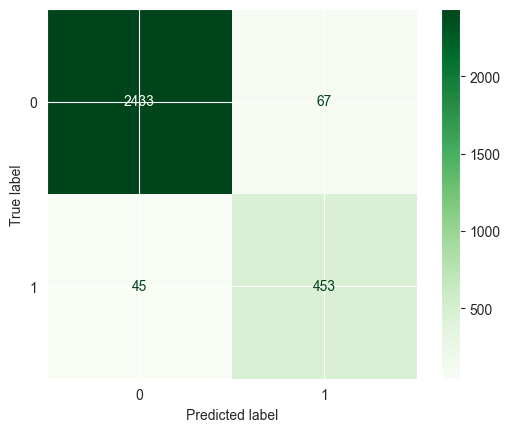

In [119]:
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(cmap=plt.cm.Greens);

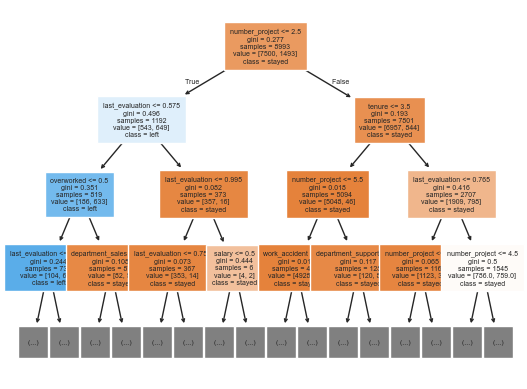

In [126]:
plot_tree(tree2.best_estimator_, max_depth=3, fontsize=5, feature_names=X.columns,
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [127]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.344043
number_project,0.343470
tenure,0.215627
overworked,0.093521
department_support,0.001142
salary,0.000911
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_marketing,0.000078


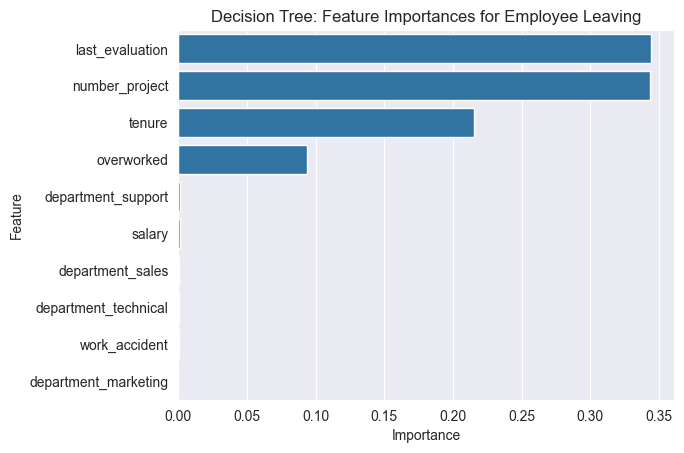

In [128]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

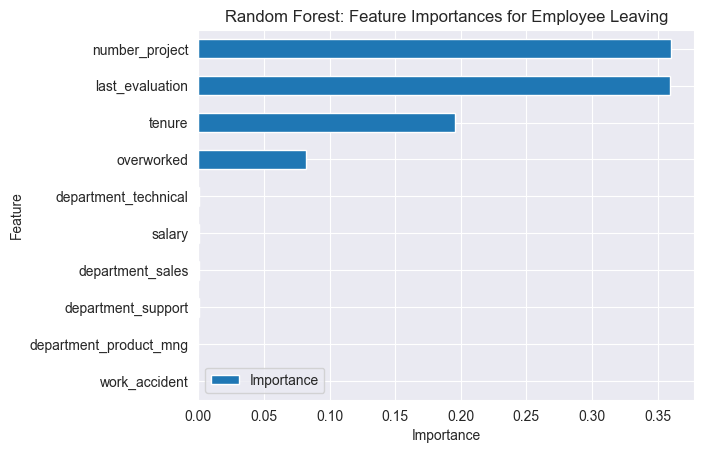

In [129]:
feat_impt = rf2.best_estimator_.feature_importances_

ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

feat = X.columns[ind]

feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()